# **Index**

## 1.     Handle NaN's

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import AxesGrid
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("/home/matteolab/kag_risk_factors_cervical_cancer.csv")

df_nan = df.replace("?", np.nan)


df1 = df_nan.convert_objects(convert_numeric=True)


df1.isnull().sum()

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  


# 1) Handle NaN's

To handle Nan we have to see correlation between variables. But according to data, size higher than 100 NaN values can be effect data. We can fill features which have lower than 100 Nan values with median values.

In [2]:
df1['First sexual intercourse'].fillna(df1['First sexual intercourse'].median(), inplace = True)
df1['Num of pregnancies'].fillna(df1['Num of pregnancies'].median(), inplace = True)
df1['First sexual intercourse'].fillna(df1['First sexual intercourse'].median(), inplace = True)
df1['Smokes'].fillna(0,inplace = True)
df1['Number of sexual partners'].fillna(df1['Number of sexual partners'].median(), inplace = True)

l = (df1['Smokes']==1)
df1.loc[l,'Smokes (years)'] = df1.loc[l,'Smokes (years)'].fillna(df1.loc[l,'Smokes (years)'].median())

l = (df1['Smokes']==0)
df1.loc[l,'Smokes (years)'] = df1.loc[l,'Smokes (years)'].fillna(0)

l = (df1['Smokes']==1)
df1.loc[l,'Smokes (packs/year)'] = df1.loc[l,'Smokes (packs/year)'].fillna(df1.loc[l,'Smokes (packs/year)'].median())

l = (df1['Smokes']==0)
df1.loc[l,'Smokes (packs/year)'] = df1.loc[l,'Smokes (packs/year)'].fillna(0)
#df2 = df1.drop(['Hinselmann','Schiller','Citology','Biopsy'], axis = 1)
df2=df1.copy()

##  1.1)Hormonal Contraceptives (HC)

In the data diagnosis data have too much Nan values. Because of that we cannot determine effect of this data. We have to drop them. Then using pearson correlation we can determine which feature is effect 'Hormonal Contraceptives'.

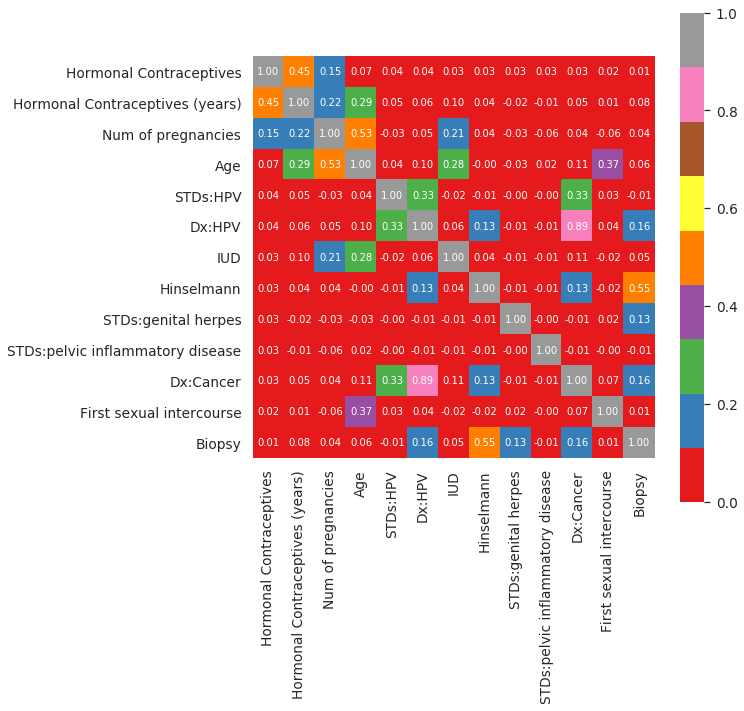

In [3]:
corrmat = df2.corr()
k = 15 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Hormonal Contraceptives')['Hormonal Contraceptives'].index

cols =cols.drop(['STDs: Time since first diagnosis','STDs: Time since last diagnosis'])

cm = df2[cols].corr()

plt.figure(figsize=(9,9))

sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, cmap='Set1' ,annot=True,vmin=0,vmax =1, square=True, fmt='.2f', annot_kws={'size': 10},
                 yticklabels = cols.values, xticklabels = cols.values)
plt.show()

According to heatmap, we have to fill Nan values with corralated features.

In [4]:
# If patient is older than sample mean or number of pregnancies is lower than mean then patient may take Hormonal Contraceptives
l = (df2['Age']>df2['Age'].mean())
df2.loc[l,'Hormonal Contraceptives'] = df2.loc[l,'Hormonal Contraceptives'].fillna(1)

l = (df2['Num of pregnancies']<df2['Num of pregnancies'].mean())
df2.loc[l,'Hormonal Contraceptives'] = df2.loc[l,'Hormonal Contraceptives'].fillna(1)

df2['Hormonal Contraceptives'].fillna(0,inplace = True)

df2['Hormonal Contraceptives'].isnull().sum()

0

For HC(years) NaN values we can fill with median values by using HC feature.

In [5]:
l = (df2['Hormonal Contraceptives'] == 1)
df2.loc[l,'Hormonal Contraceptives (years)'] = df2.loc[l,'Hormonal Contraceptives (years)'].fillna(df2['Hormonal Contraceptives (years)'].median())

l = (df2['Hormonal Contraceptives'] == 0)
df2.loc[l,'Hormonal Contraceptives (years)'] = df2.loc[l,'Hormonal Contraceptives (years)'].fillna(0)

## 1.2) IUD

Using pearson correlation we can determine which feature is effect 'IUD'.

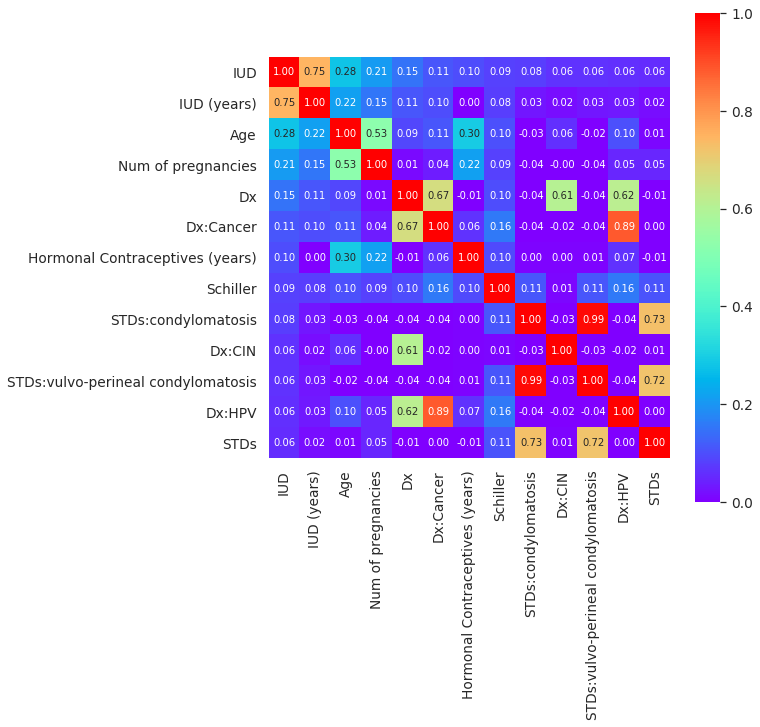

In [6]:
corrmat = df2.corr()
k = 15 #number of variables for heatmap
cols = corrmat.nlargest(k, 'IUD')['IUD'].index

cols =cols.drop(['STDs: Time since first diagnosis','STDs: Time since last diagnosis'])

cm = df2[cols].corr()

plt.figure(figsize=(9,9))

sns.set(font_scale=1.25)
hm = sns.heatmap(cm,cmap = 'rainbow', cbar=True, annot=True,vmin=0,vmax =1, square=True, fmt='.2f', annot_kws={'size': 10},
                 yticklabels = cols.values, xticklabels = cols.values)
plt.show()

This figure show that Age and Number of pregnancies features have effect on IUD feature.

In [7]:
len(df2[(df2['Age']>df2['Age'].mean())&(df2['IUD']==1)])

66

In [8]:
len(df2[df2['IUD']==1])

83

This show that %80 of patients who take IUD are older than age mean. We can fillna values according to this discovery.

In [9]:
l = (df2['Age']>df2['Age'].mean())
df2.loc[l,'IUD'] = df2.loc[l,'IUD'].fillna(1)

We can fill remaining NaN with 0 values.

In [10]:
df2['IUD'].fillna(0, inplace = True)

For IUD (years) feature we can fill NaN values with IUD feature.

In [11]:
l = (df2['IUD'] == 1)
df2.loc[l,'IUD (years)'] = df2.loc[l,'IUD (years)'].fillna(df2['IUD (years)'].median())

l = (df2['IUD'] == 0)
df2.loc[l,'IUD (years)'] = df2.loc[l,'IUD (years)'].fillna(0)

Also we need to check relationship between IUD and IUD (years)

In [12]:
len(df2[(df2['IUD'] == 1) & (df2['IUD (years)'] == 0) ]) #questi li ho messi sbagliati e devo cambiarli

38

If patient take IUD then UID (years) have to be non zero values then we need to change it to mean values.

In [13]:
l = (df2['IUD'] == 1) & (df2['IUD (years)'] == 0)
df2.loc[l,'IUD (years)'] = df2['IUD (years)'].mean()

len(df2[(df2['IUD'] == 1) & (df2['IUD (years)'] == 0) ])

0

In [14]:
len(df2[(df2['IUD'] == 0) & (df2['IUD (years)'] != 0) ])

0

## 1.3)STDs

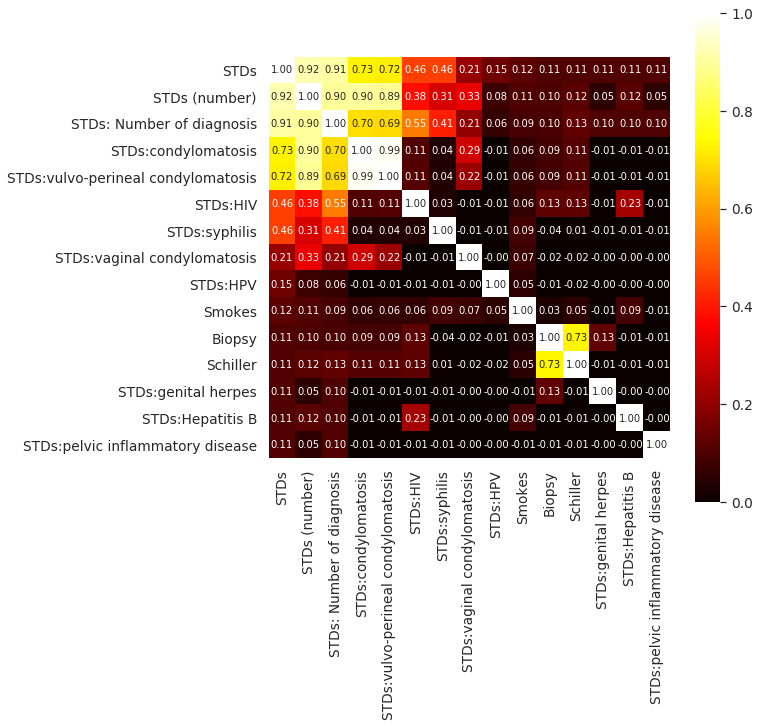

In [15]:
corrmat = df2.corr()
k = 15 #number of variables for heatmap
cols = corrmat.nlargest(k, 'STDs')['STDs'].index

#cols =cols.drop(['STDs: Time since first diagnosis','STDs: Time since last diagnosis'])

cm = df2[cols].corr()

plt.figure(figsize=(9,9))

sns.set(font_scale=1.25)
hm = sns.heatmap(cm,cmap = 'hot', cbar=True, annot=True,vmin=0,vmax =1, square=True, fmt='.2f', annot_kws={'size': 10},
                 yticklabels = cols.values, xticklabels = cols.values)
plt.show()

According to heatmap we can easily say that 'STDs:condylomatosis' and STDs:vulvo-perineal condylomatosis' features effect 'STDs'. We cannot take 'STD (number)' and 'STDs: Number of diagnosis' because they are same features as 'STDs'. According to our knowledge about STDs we can easily fill Nan values with 1 or zero because if patient have any of STDs diseases then patient STDs feature must be 1 others must be zero.

In [16]:
df3 = df2.copy()

l = (df3['STDs:condylomatosis']==1)
df3.loc[l,'STDs'] = df3.loc[l,'STDs'].fillna(1)

l = (df3['STDs:cervical condylomatosis']==1)
df3.loc[l,'STDs'] = df3.loc[l,'STDs'].fillna(1)

l = (df3['STDs:vaginal condylomatosis']==1)
df3.loc[l,'STDs'] = df3.loc[l,'STDs'].fillna(1)

l = (df3['STDs:vulvo-perineal condylomatosis']==1)
df3.loc[l,'STDs'] = df3.loc[l,'STDs'].fillna(1)

l = (df3['STDs:syphilis']==1)
df3.loc[l,'STDs'] = df3.loc[l,'STDs'].fillna(1)

l = (df3['STDs:pelvic inflammatory disease']==1)
df3.loc[l,'STDs'] = df3.loc[l,'STDs'].fillna(1)

l = (df3['STDs:genital herpes']==1)
df3.loc[l,'STDs'] = df3.loc[l,'STDs'].fillna(1)

l = (df3['STDs:molluscum contagiosum']==1)
df3.loc[l,'STDs'] = df3.loc[l,'STDs'].fillna(1)

l = (df3['STDs:AIDS']==1)
df3.loc[l,'STDs'] = df3.loc[l,'STDs'].fillna(1)

l = (df3['STDs:HIV']==1)
df3.loc[l,'STDs'] = df3.loc[l,'STDs'].fillna(1)

l = (df3['STDs:Hepatitis B']==1)
df3.loc[l,'STDs'] = df3.loc[l,'STDs'].fillna(1)

l = (df3['STDs:HPV']==1)
df3.loc[l,'STDs'] = df3.loc[l,'STDs'].fillna(1)

%75 of patients who does not take IUD are also have STDs

In [17]:
l = (df3['IUD']==0)
df3.loc[l,'STDs'] = df3.loc[l,'STDs'].fillna(1)
df3['STDs'].fillna(0, inplace = True)

df3['STDs'].isnull().sum()

0

Also STDs (number) is same feature as STDs.

In [18]:
df3['STDs (number)'].median()

0.0

In [19]:
df3['STDs (number)'].mean()

0.17662682602921648

This case median is not useful so we can use mean values.

In [20]:
l = (df3['STDs']==1)
df3.loc[l,'STDs (number)'] = df3.loc[l,'STDs (number)'].fillna(df3['STDs (number)'].mean())
df3['STDs (number)'].fillna(0, inplace = True)

df3['STDs (number)'].isnull().sum()

0

## 1.4)STDs Diseases

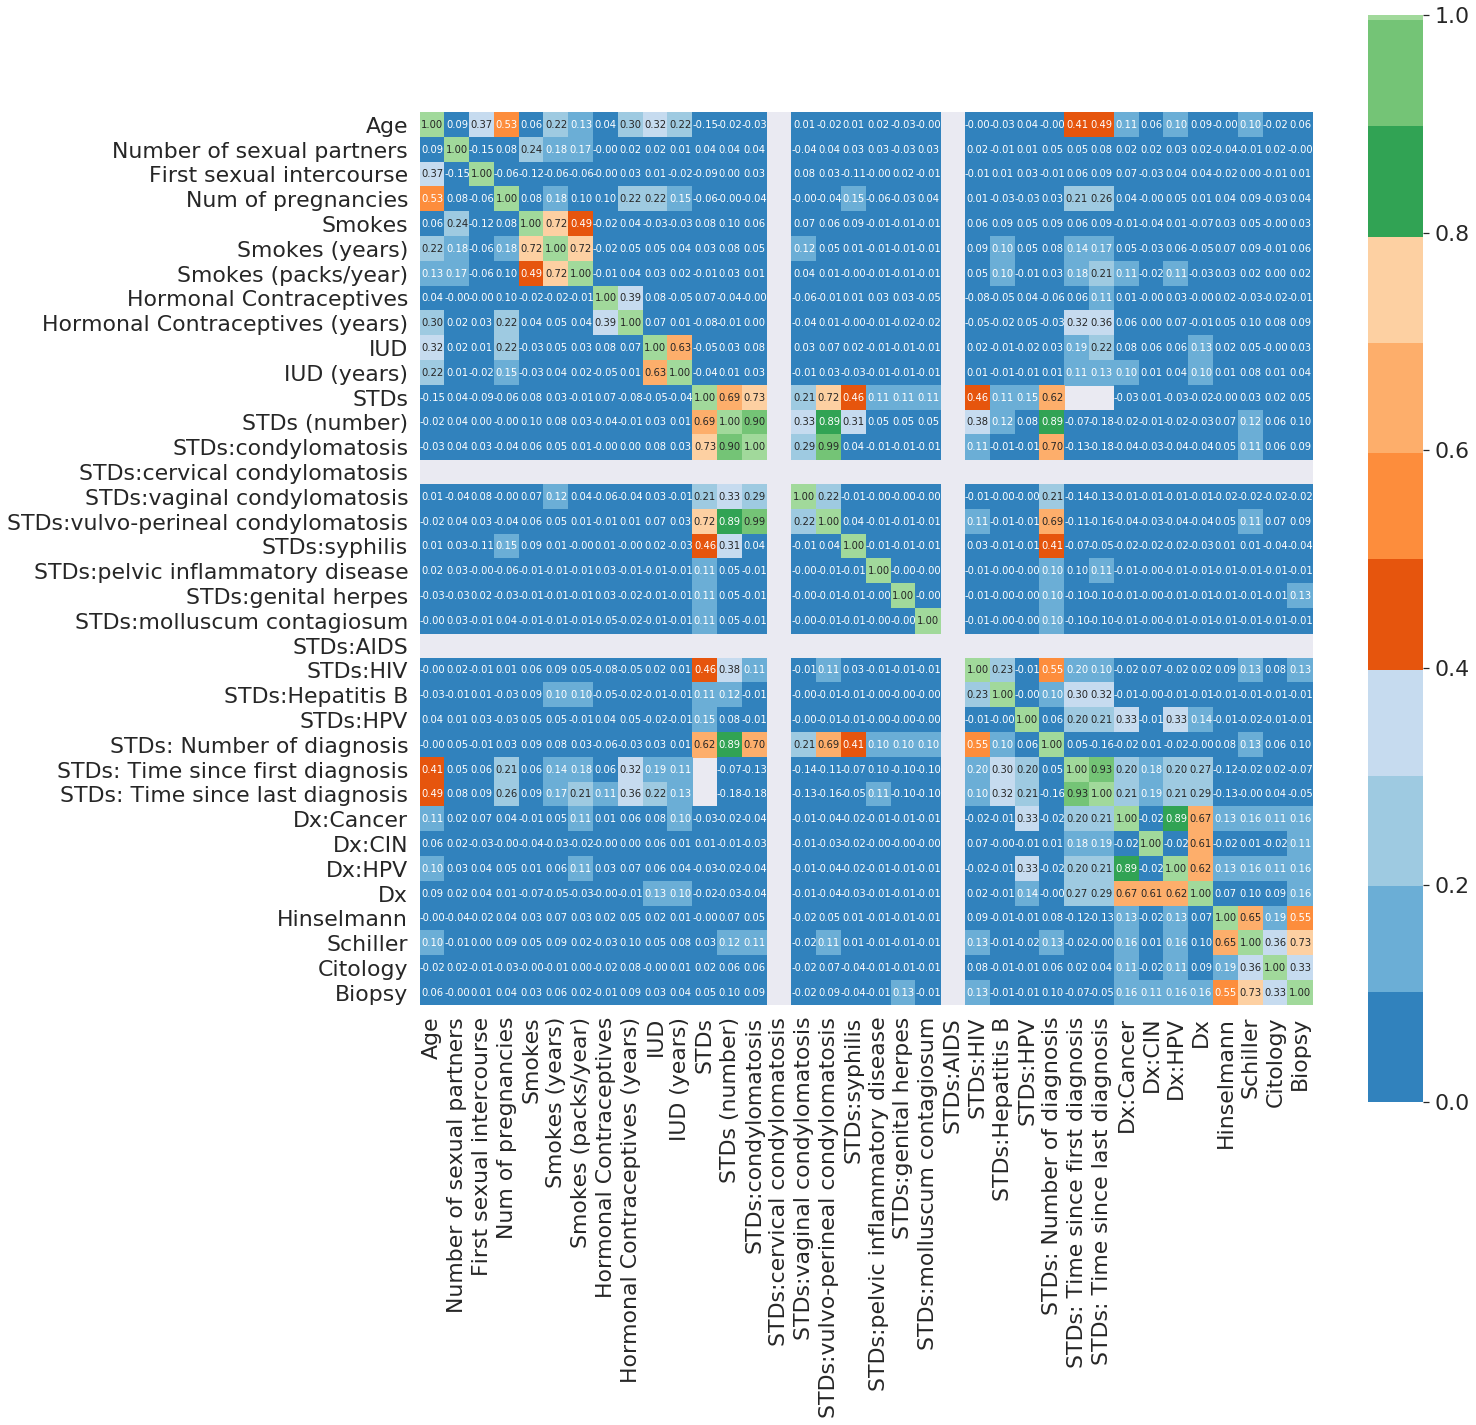

In [21]:
corrmat = df3.corr()

plt.figure(figsize=(20,20))

sns.set(font_scale=2)
hm = sns.heatmap(corrmat,cmap = 'tab20c', cbar=True, annot=True,vmin=0,vmax =1,center=True, square=True, fmt='.2f', annot_kws={'size': 10},
             yticklabels = df3.columns, xticklabels = df3.columns)
plt.show()

In [22]:
df4= df3.copy()

According to heatmap and also our knowledge about field all STDs diseases depend on STDs feature and also STD (number).

In [23]:
l = (df4['STDs']==0)
df4.loc[l,'STDs:condylomatosis'] = df4.loc[l,'STDs:condylomatosis'].fillna(0)

l = (df4['STDs']==0)
df4.loc[l,'STDs:cervical condylomatosis'] = df4.loc[l,'STDs:cervical condylomatosis'].fillna(0)

l = (df4['STDs']==0)
df4.loc[l,'STDs:vaginal condylomatosis'] = df4.loc[l,'STDs:vaginal condylomatosis'].fillna(0)

l = (df4['STDs']==0)
df4.loc[l,'STDs:vulvo-perineal condylomatosis'] = df4.loc[l,'STDs:vulvo-perineal condylomatosis'].fillna(0)

l = (df4['STDs']==0)
df4.loc[l,'STDs:syphilis'] = df4.loc[l,'STDs:syphilis'].fillna(0)

l = (df4['STDs']==0)
df4.loc[l,'STDs:pelvic inflammatory disease'] = df4.loc[l,'STDs:pelvic inflammatory disease'].fillna(0)

l = (df4['STDs']==0)
df4.loc[l,'STDs:genital herpes'] = df4.loc[l,'STDs:genital herpes'].fillna(0)

l = (df4['STDs']==0)
df4.loc[l,'STDs:molluscum contagiosum'] = df4.loc[l,'STDs:molluscum contagiosum'].fillna(0)

df4['STDs:molluscum contagiosum'].isnull().sum()

74

For other values we have to fill Nan values with median because all STDs depends on other STDs and also we cannot sure about person disease.

In [24]:
df4['STDs:condylomatosis'].fillna(df4['STDs:condylomatosis'].median(),inplace = True)
df4['STDs:cervical condylomatosis'].fillna(df4['STDs:cervical condylomatosis'].median(),inplace = True)
df4['STDs:vaginal condylomatosis'].fillna(df4['STDs:vaginal condylomatosis'].median(),inplace = True)
df4['STDs:vulvo-perineal condylomatosis'].fillna(df4['STDs:vulvo-perineal condylomatosis'].median(),inplace = True)
df4['STDs:syphilis'].fillna(df4['STDs:syphilis'].median(),inplace = True)
df4['STDs:pelvic inflammatory disease'].fillna(df4['STDs:pelvic inflammatory disease'].median(),inplace = True)
df4['STDs:genital herpes'].fillna(df4['STDs:genital herpes'].median(),inplace = True)
df4['STDs:molluscum contagiosum'].fillna(df4['STDs:molluscum contagiosum'].median(),inplace = True)

df4['STDs:molluscum contagiosum'].isnull().sum()

0

## 1.5)AIDS

This feature correlation not show us any clue. But we know that AIDS also a STDs disease. Then we can fill NaN values as;

In [25]:
l = (df4['STDs']==0)
df4.loc[l,'STDs:AIDS'] = df4.loc[l,'STDs:AIDS'].fillna(0)
df4['STDs:AIDS'].fillna(df4['STDs:AIDS'].median(),inplace = True)

df4['STDs:AIDS'].isnull().sum()

0

## 1.6)STDs:HIV

This feature effect by STD feature.

In [26]:
len(df4[df4['STDs:HIV']==1])

18

In [27]:
len(df4[(df4['STDs:HIV']==1) & (df4['STDs']==1)])

18

%100 of patient who have STDs then they have STDs:HIV

In [28]:
l = (df4['STDs']==1)
df4.loc[l,'STDs:HIV'] = df4.loc[l,'STDs:HIV'].fillna(1)
df4['STDs:HIV'].fillna(0,inplace = True)

Cheking contradiction values;

In [29]:
len(df4[(df4['STDs']==0) & (df4['STDs:HIV'] == 1)])

0

In [30]:
df4['STDs:HIV'].isnull().sum()

0

## 1.7)STDs:Hepatitis B

This feature effect by STDs:HIV feature.

In [31]:
len(df4[df4['STDs:Hepatitis B']==1])

1

There is a one person who have disease. According to population this value is so minimal. We can fill Nan values with 0.

In [32]:
df4['STDs:Hepatitis B'].fillna(0, inplace = True)

df4['STDs:Hepatitis B'].isnull().sum()

0

## 1.8)STDs:HPV

In [33]:
df4['STDs:HPV'].fillna(0, inplace = True)

df4['STDs:HPV'].isnull().sum()

0

## 1.8)STDs: Time since first diagnosis and STDs: Time since last diagnosis 

If patient STDs is zero then first diagnosis and last diagnosis cannot be a value. We can fill Nan values with this knowledge.

In [34]:
l = (df4['STDs']==1)
df4.loc[l,'STDs: Time since first diagnosis'] = df4.loc[l,'STDs: Time since first diagnosis'].fillna(df4['STDs: Time since first diagnosis'].median())

l = (df4['STDs']==1)
df4.loc[l,'STDs: Time since last diagnosis'] = df4.loc[l,'STDs: Time since last diagnosis'].fillna(df4['STDs: Time since last diagnosis'].median())

df4['STDs: Time since last diagnosis'].fillna(0, inplace = True)
df4['STDs: Time since first diagnosis'].fillna(0, inplace = True)

df4['STDs: Time since last diagnosis'].isnull().sum()

0

In [35]:
df4.to_csv('dataset_cancer_no_miss.csv', sep=',')